# Imports

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt # useful for visualization
import seaborn as sns # useful for visualization
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from fancyimpute import IterativeImputer
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, roc_auc_score
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Reading CSV

### Reading the data from the CSV file and renaming the columns to shorter names.

In [2]:
df = pd.read_csv('C://Users/Youse/Documents/Tanmeyah/Credit Score Model/cs-training.csv',
                     index_col=0, names= ['Index','Serious','Utilization','Age','30DaysPast','DebtRatio','MonthlyIncome','Loans','90DaysPast','RealStateLoans','60DaysPast','Dependents'],
                       skiprows=range(1)
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


### Rearranging the columns.

In [3]:
df = df[['Serious','Age','Dependents','Utilization','MonthlyIncome','DebtRatio','Loans','RealStateLoans']]

In [4]:
df.head(10)

,Serious,Age,Dependents,Utilization,MonthlyIncome,DebtRatio,Loans,RealStateLoans
Index,,,,,,,,
1,1,45,2.0,0.766127,9120.0,0.802982,13,6
2,0,40,1.0,0.957151,2600.0,0.121876,4,0
3,0,38,0.0,0.658180,3042.0,0.085113,2,0
4,0,30,0.0,0.233810,3300.0,0.036050,5,0
5,0,49,0.0,0.907239,63588.0,0.024926,7,1
6,0,74,1.0,0.213179,3500.0,0.375607,3,1
7,0,57,0.0,0.305682,NaN,5710.000000,8,3
8,0,39,0.0,0.754464,3500.0,0.209940,8,0
9,0,27,NaN,0.116951,NaN,46.000000,2,0


In [5]:
df.shape

(150000, 8)

In [6]:
df.describe()

,Serious,Age,Dependents,Utilization,MonthlyIncome,DebtRatio,Loans,RealStateLoans
count,150000.000000,150000.000000,146076.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000
mean,0.066840,52.295207,0.757222,6.048438,6.670221e+03,353.005076,8.452760,1.018240
std,0.249746,14.771866,1.115086,249.755371,1.438467e+04,2037.818523,5.145951,1.129771
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,0.029867,3.400000e+03,0.175074,5.000000,0.000000
50%,0.000000,52.000000,0.000000,0.154181,5.400000e+03,0.366508,8.000000,1.000000
75%,0.000000,63.000000,1.000000,0.559046,8.249000e+03,0.868254,11.000000,2.000000
max,1.000000,109.000000,20.000000,50708.000000,3.008750e+06,329664.000000,58.000000,54.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Serious         150000 non-null  int64  
 1   Age             150000 non-null  int64  
 2   Dependents      146076 non-null  float64
 3   Utilization     150000 non-null  float64
 4   MonthlyIncome   120269 non-null  float64
 5   DebtRatio       150000 non-null  float64
 6   Loans           150000 non-null  int64  
 7   RealStateLoans  150000 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 10.3 MB


## Correlation Plot

<AxesSubplot:>

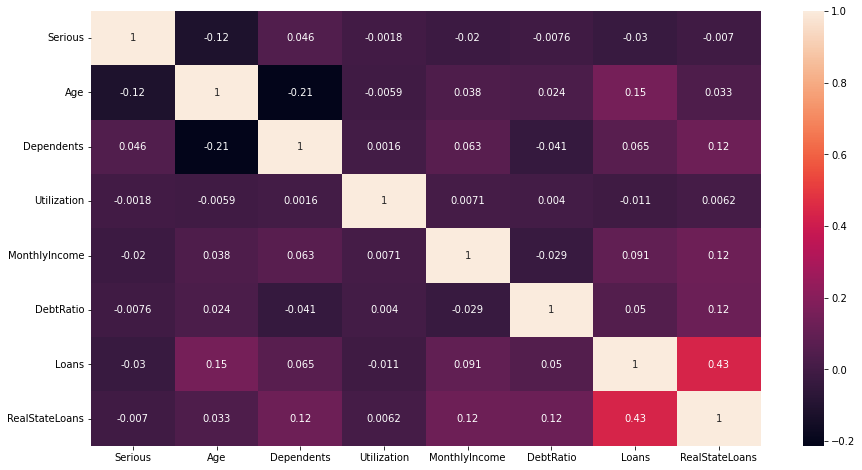

In [8]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True)

# Understanding the data

## Serious

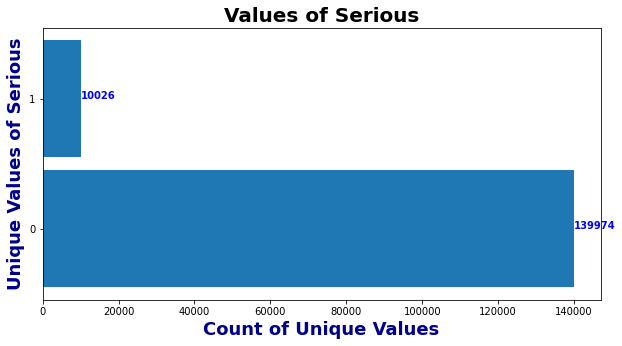

In [9]:
Serious_Count_Values = df['Serious'].value_counts()
keys = Serious_Count_Values.index.tolist()
values = Serious_Count_Values.values.tolist()
# plt.bar(keys, values, width=0.9, tick_label = keys)

fig, ax = plt.subplots(figsize=(10,5))
width = 0.9
ax.barh(keys, values, width,  tick_label = keys, )
for index, value in enumerate(values):
    plt.text(value, index, str(value),color = 'blue', fontweight = 'bold',fontsize=10)

plt.xlabel("Count of Unique Values",color='darkblue', fontweight='bold', fontsize='18')
plt.ylabel("Unique Values of Serious",color='darkblue', fontweight='bold', fontsize='18')
plt.title("Values of Serious", fontweight='bold', fontsize='20')
plt.show()

## Dependents

### A graph showing the distribution of the Dependents variable.

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Dependents')

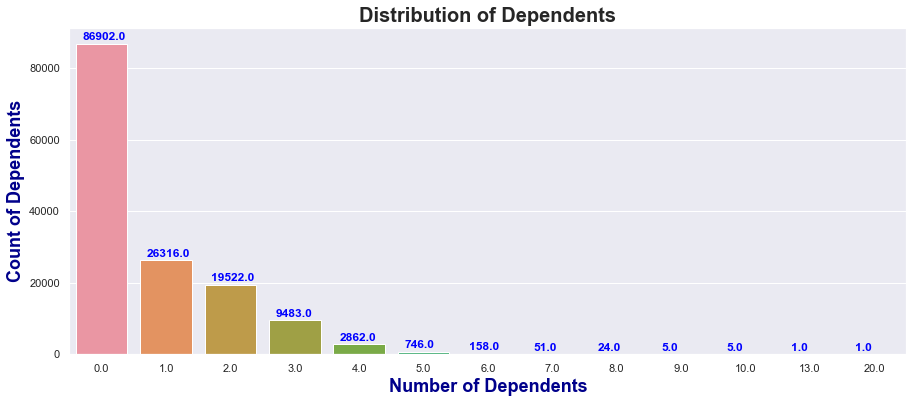

In [10]:
sns.set(rc={'figure.figsize':(15,6)})
ax=sns.countplot('Dependents', data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() +0.1, p.get_height()+1000), fontweight='bold', color='blue')
plt.xlabel("Number of Dependents",color='darkblue', fontweight='bold', fontsize='18')
plt.ylabel("Count of Dependents",color='darkblue', fontweight='bold', fontsize='18')
plt.title("Distribution of Dependents", fontweight='bold', fontsize='20')

## Missing values in Dependents

### Number of missing values.

In [11]:
df['Dependents'].isna().sum()

3924

### We can replace the missing values of Dependents with the average which is 1.

In [12]:
df['Dependents'].mean()

0.7572222678605657

### We can replace Null values of Dependents with Age > 90 with the most frequent value which is 0.

In [13]:
df[df['Age'] >= 90]['Dependents'].value_counts()

0.0    517
1.0     49
Name: Dependents, dtype: int64

### Replacing

In [14]:
df['Dependents'] = np.where((df['Dependents'].isna()) & (df['Age'] >= 90), 0, df['Dependents'])

In [15]:
df[df['Age'] >= 90]['Dependents'].value_counts()

0.0    638
1.0     49
Name: Dependents, dtype: int64

### For Ages >= 25 and Ages < 60 , We can replace Null values of Dependents with the mean which is 1.


In [16]:
df.query('Age >= 25 and Age < 60')['Dependents'].mean()

0.9922435524529766

In [17]:
df.query('Age >= 25 and Age < 60')['Dependents'].value_counts()

0.0     48925
1.0     18572
2.0     17822
3.0      8968
4.0      2749
5.0       715
6.0       153
7.0        48
8.0        20
9.0         5
10.0        4
20.0        1
13.0        1
Name: Dependents, dtype: int64

### Replacing

In [18]:
df['Dependents'] = np.where(((df['Age'] >= 25) & (df['Age'] < 60) & df['Dependents'].isna()), 1, df['Dependents'])

In [19]:
df.query('Age >= 25 and Age < 60')['Dependents'].value_counts()

0.0     48925
1.0     20196
2.0     17822
3.0      8968
4.0      2749
5.0       715
6.0       153
7.0        48
8.0        20
9.0         5
10.0        4
20.0        1
13.0        1
Name: Dependents, dtype: int64

### For Ages >= 60 and Ages < 90 , We can replace Null values of Dependents with the mean which is 0.


In [20]:
df.query('Age >= 60 and Age < 90')['Dependents'].mean()

0.2882351651724062

### Replacing

In [21]:
df['Dependents'] = np.where(((df['Age'] >= 60) & (df['Age'] < 90) & df['Dependents'].isna()), 0, df['Dependents'])

In [22]:
df.query('Age >= 60 and Age < 90')['Dependents'].value_counts()

0.0     37700
1.0      7604
2.0      1664
3.0       507
4.0       112
5.0        31
6.0         5
8.0         4
7.0         3
10.0        1
Name: Dependents, dtype: int64

### We can replace Null values of Dependents with Age < 25  with the most frequent value which is 0.

In [23]:
df[df['Age'] < 25]['Dependents'].value_counts()

0.0    1772
1.0      91
2.0      36
3.0       8
4.0       1
Name: Dependents, dtype: int64

### Replacing

In [24]:
df['Dependents'] = np.where((df['Dependents'].isna()) & (df['Age'] < 25), 0, df['Dependents'])

## Age

### All the unique ages

In [25]:
df['Age'].sort_values().unique()

array([  0,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 101, 102, 103, 105, 107, 109], dtype=int64)

### Only one record with Age == 0

#### This record can be removed as it wont serve any purpose trying to estimate a value for it.

In [26]:
df.loc[df['Age'] == 0]
df= df[df['Age'] > 1]

### There is 13 records with Age > 99

#### Those records could be removed, but then maybe if the age was an important feature then people with age > 99 would be misjudged.

In [27]:
df[df['Age']>99]['Age'].count()

13

## Decision Tree Classification

### Using DecisionTreeClassifier to do Discretisation.

#### Splitting the Data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'Serious']],df.Serious , test_size = 0.3)

#### Finding the optimum depth

In [29]:
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    scores = cross_val_score(tree_model, X_train.Age.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    score_ls.append(np.mean(scores))
    score_std_ls.append(np.std(scores))
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.604439     0.000363
1      2      0.626233     0.000943
2      3      0.630795     0.001379
3      4      0.633252     0.002525


#### Training the model on the selected depth

In [30]:
tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(X_train.Age.to_frame(), X_train.Serious)
X_train['Age_tree'] = tree_model.predict_proba(X_train.Age.to_frame())[:,1]
X_test['Age_tree'] = tree_model.predict_proba(X_test.Age.to_frame())[:,1]

In [31]:
pd.concat( [X_train.groupby(['Age_tree'])['Age'].min(),
            X_train.groupby(['Age_tree'])['Age'].max()], axis=1)

,Age,Age
Age_tree,,
0.000000,102,109
0.022993,68,98
0.030957,64,67
0.039095,63,63
0.046118,60,62
0.052775,56,59
0.061623,55,55
0.070915,53,54
0.074347,50,52


#### Plotting the population of  Age Buckets.

<AxesSubplot:xlabel='Age_tree'>

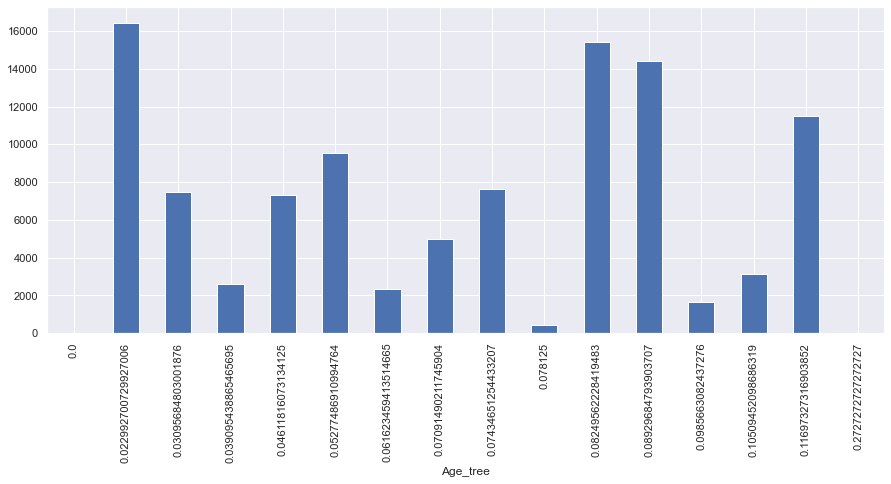

In [32]:
X_train.groupby(['Age_tree'])['Serious'].count().plot.bar()

### Cutting the Age into bins using intervals generated by the DecisionTreeClassifier.

In [33]:
cat = pd.cut(df['Age'],bins = [21,22,28,33,36,42,47,52,55,56,57,62,63,67,98,109], labels=['<= 22','<= 28','<= 33','<= 36','<= 42','<= 47','<= 52','<= 55','<= 56','<= 57','<= 62','<= 63','<= 67','98','<= 109'],include_lowest=True)
df.insert(2, 'Age_DT', cat)
one_hot = pd.get_dummies(df['Age_DT'], prefix='Age')
df = df.join(one_hot)

## MonthlyIncome

### Only 301 Records have MonthlyIncome > 50000 while the the rest of the 80% are under 50000.

In [34]:
df[df['MonthlyIncome'] > 50000]['MonthlyIncome'].count()

301

### MonthlyIncome Plots

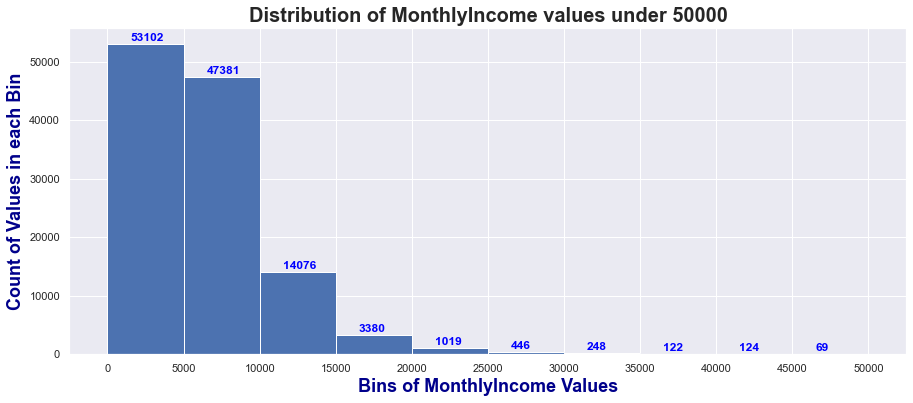

In [35]:
no_of_bins=10
df[df['MonthlyIncome'] <= 50000]['MonthlyIncome'].hist(figsize = (15,6), bins=no_of_bins, color = 'blue')
arr=plt.hist(df[df['MonthlyIncome'] <= 50000]['MonthlyIncome'],bins=no_of_bins)
for i in range(no_of_bins):
    plt.text(arr[1][i] + 1500 ,arr[0][i] + 500,str(int(arr[0][i])), color = 'blue', fontweight = 'bold', fontsize=12)
plt.locator_params(axis='x', nbins=no_of_bins)
plt.xticks(np.arange(0,50001,5000))
plt.xlabel("Bins of MonthlyIncome Values",color='darkblue', fontweight='bold', fontsize='18')
plt.ylabel("Count of Values in each Bin",color='darkblue', fontweight='bold', fontsize='18')
plt.title("Distribution of MonthlyIncome values under 50000", fontweight='bold', fontsize='20')
plt.show()

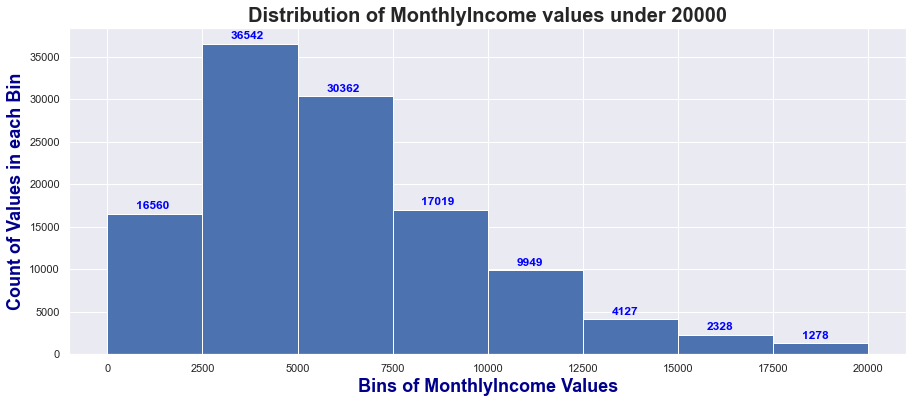

In [36]:
no_of_bins=8
df[df['MonthlyIncome'] <= 20000]['MonthlyIncome'].hist( figsize=(15,6),bins=no_of_bins, color = 'blue')
arr=plt.hist(df[df['MonthlyIncome'] <= 20000]['MonthlyIncome'],bins=no_of_bins)
for i in range(no_of_bins):
    plt.text(arr[1][i] + 750 ,arr[0][i] +500, str(int(arr[0][i])), color = 'blue', fontweight = 'bold', fontsize=12)
plt.locator_params(axis='x', nbins=no_of_bins)
plt.xticks(np.arange(0,20001,2500))
plt.xlabel("Bins of MonthlyIncome Values",color='darkblue', fontweight='bold', fontsize='18')
plt.ylabel("Count of Values in each Bin",color='darkblue', fontweight='bold', fontsize='18')
plt.title("Distribution of MonthlyIncome values under 20000", fontweight='bold', fontsize='20')
plt.show()

In [37]:
# no_of_bins=10
# fig, ax = plt.subplots()
# import matplotlib.ticker as ticker
# df2[df2['MonthlyIncome'] <= 50000]['MonthlyIncome'].hist( figsize=(15,6),bins=no_of_bins, color = 'blue')
# arr=plt.hist(df2[df2['MonthlyIncome'] <= 50000]['MonthlyIncome'],bins=no_of_bins, color = ['#00B7C3'])
# for i in range(no_of_bins):
#     plt.text(arr[1][i] + 1500 ,arr[0][i] + 500,str(int(arr[0][i])), color = '#605E5C', fontweight = 'bold', fontsize=14)
# plt.locator_params(axis='x', nbins=no_of_bins)
# plt.xticks(np.arange(0,50001,5000),fontsize=14)
# plt.yticks(fontsize=14)
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(
#     lambda y, pos: '%.0fK' % (y * 1e-3)))
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(
#     lambda y, pos: '%.0fK' % (y * 1e-3)))
# plt.xlabel("Bins of MonthlyIncome Values",color='#252423', fontweight='bold', fontsize='18')
# plt.ylabel("Count of Values in each Bin",color='#252423', fontweight='bold', fontsize='18')
# plt.title("Distribution of MonthlyIncome values under 50000", fontweight='bold', fontsize='20', color='#00838F')
# plt.show()

### 20% of the MonthlyIncome values are NULL.

In [38]:
df['MonthlyIncome'].isna().sum()

29731

### Using MICE to replace the missing values of MonthlyIncome.

In [39]:
# calling the  MICE class
mice_imputer = IterativeImputer()
# imputing the missing value with mice imputer
df2 = mice_imputer.fit_transform(df[['Dependents','MonthlyIncome', 'Loans','RealStateLoans']])
df2 = pd.DataFrame(df2, columns = ['Dependents','MonthlyIncome', 'Loans','RealStateLoans'])
df['MonthlyIncome'] = df2['MonthlyIncome'].values

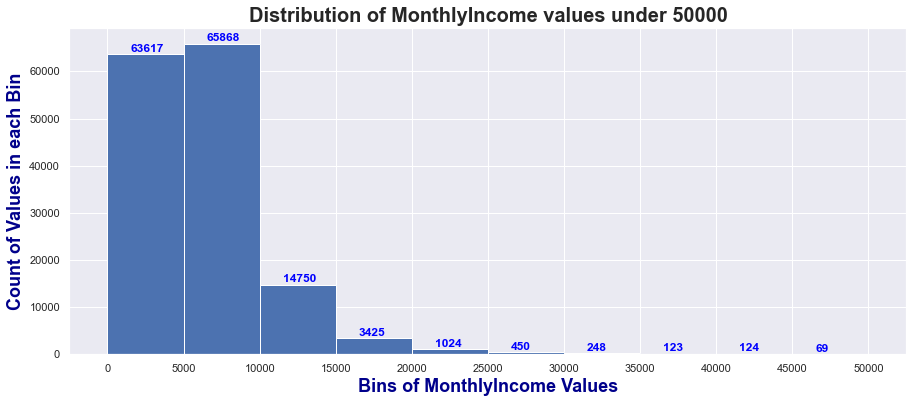

In [40]:
no_of_bins=10
df2[df2['MonthlyIncome'] <= 50000]['MonthlyIncome'].hist( figsize=(15,6),bins=no_of_bins, color = 'blue')
arr=plt.hist(df2[df2['MonthlyIncome'] <= 50000]['MonthlyIncome'],bins=no_of_bins)
for i in range(no_of_bins):
    plt.text(arr[1][i] + 1500 ,arr[0][i] + 500,str(int(arr[0][i])), color = 'blue', fontweight = 'bold', fontsize=12)
plt.locator_params(axis='x', nbins=no_of_bins)
plt.xticks(np.arange(0,50001,5000))
plt.xlabel("Bins of MonthlyIncome Values",color='darkblue', fontweight='bold', fontsize='18')
plt.ylabel("Count of Values in each Bin",color='darkblue', fontweight='bold', fontsize='18')
plt.title("Distribution of MonthlyIncome values under 50000", fontweight='bold', fontsize='20')
plt.show()

## DecisionTreeClassifier

### Splitting the data.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df[['MonthlyIncome', 'Serious']],df.Serious , test_size = 0.3)

### Selecting the optimum depth

In [42]:
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    scores = cross_val_score(tree_model, X_train.MonthlyIncome.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    score_ls.append(np.mean(scores))
    score_std_ls.append(np.std(scores)) 
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.562144     0.002186
1      2      0.577933     0.010022
2      3      0.586752     0.007856
3      4      0.586219     0.007340


### Training the model on the selected depth

In [43]:
tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(X_train.MonthlyIncome.to_frame(), X_train.Serious)
X_train['MonthlyIncome_tree'] = tree_model.predict_proba(X_train.MonthlyIncome.to_frame())[:,1]
X_test['MonthlyIncome_tree'] = tree_model.predict_proba(X_test.MonthlyIncome.to_frame())[:,1]

In [44]:
pd.concat( [X_train.groupby(['MonthlyIncome_tree'])['MonthlyIncome'].min(),
            X_train.groupby(['MonthlyIncome_tree'])['MonthlyIncome'].max()], axis=1)

,MonthlyIncome,MonthlyIncome
MonthlyIncome_tree,,
0.000000,10613.000000,1.066200e+04
0.022124,5336.000000,5.369000e+03
0.026510,10351.000000,1.060970e+04
0.033816,5314.000000,5.335000e+03
0.036332,0.000000,2.830000e+02
0.045257,10665.000000,3.008750e+06
0.051819,6640.218797,1.035000e+04
0.056564,5370.000000,6.640000e+03
0.062406,286.000000,9.300000e+02


### Cutting MonthlyIncome into bins using intervals generated by DecisionTreeClassifier.

In [45]:
cat = pd.cut(df['MonthlyIncome'],bins = [0,260,816,930,3679,3834,3877,4838,4895,5194,5195,5313,5323,9949,42013,1560100],labels=[0,260,816,930,3679,3834,3877,4838,4895,5194,5195,5313,5323,9949,42013],include_lowest=True)
df.insert(5, 'MonthlyIncome_DT', cat)
one_hot = pd.get_dummies(df['MonthlyIncome_DT'],prefix='MonthlyIncome')
df = df.join(one_hot)

### Plotting the population of MonthlyIncome buckets.

<AxesSubplot:xlabel='MonthlyIncome_tree'>

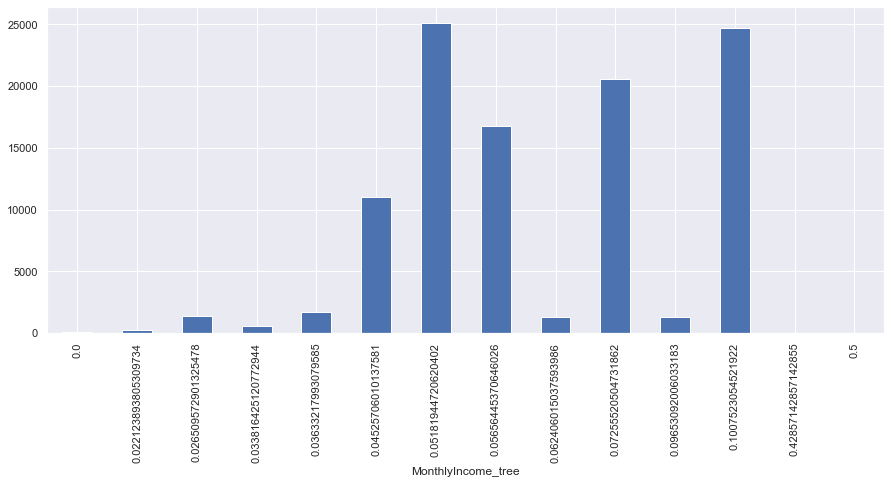

In [46]:
X_train.groupby(['MonthlyIncome_tree'])['Serious'].count().plot.bar()

## DebtRatio

### The bigger part of the DebtRatio is < 1 while only 23% are > 1.

In [47]:
df[df['DebtRatio'] > 1]['DebtRatio'].count()

35137

### For DebtRatio < 1, only 1827 out of 113036 has NaN values.

In [48]:
df[df['DebtRatio'] <= 1]['MonthlyIncome'].isna().sum()

0

### For DebtRatio > 1, only 7233 out of 35137 has values while the rest are NaN.

In [49]:
df[df['DebtRatio'] > 1]['MonthlyIncome'].isna().sum()

0

In [50]:
len(df.query('DebtRatio > 1 and MonthlyIncome.notnull()', engine='python'))

35137

### The distribution of the DebtRatio Values

#### Only 12 Records have DebtRatio > 50000

In [51]:
len(df[df['DebtRatio'] > 50000])

12

#### Only 422 Records have DebtRatio > 7500

In [52]:
df[df['DebtRatio'] > 7500]['DebtRatio'].count()

422

### DebtRatio Plots

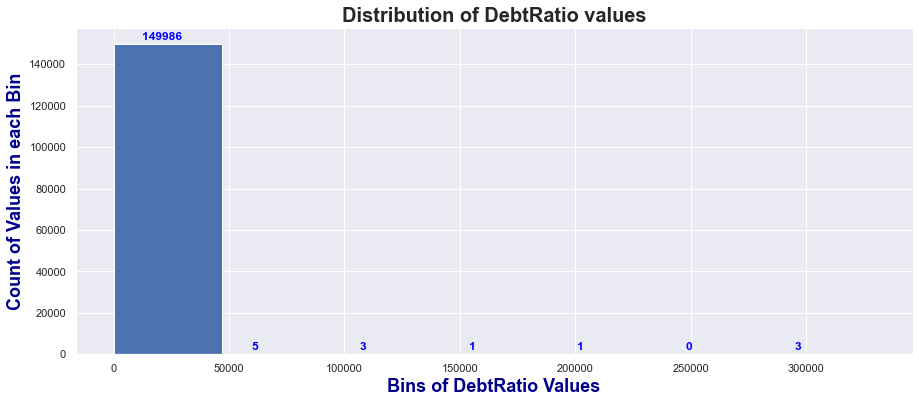

In [53]:
no_of_bins=7
df['DebtRatio'].hist( figsize=(15,6),bins=no_of_bins, color = 'blue')
arr=plt.hist(df['DebtRatio'],bins=no_of_bins)
for i in range(no_of_bins):
    plt.text(arr[1][i] + 12500 ,arr[0][i] + 2000, str(int(arr[0][i])), color = 'blue', fontweight = 'bold', fontsize=12)
plt.locator_params(axis='x', nbins=no_of_bins)
plt.xticks(np.arange(0,300001,50000))

plt.xlabel("Bins of DebtRatio Values",color='darkblue', fontweight='bold', fontsize='18')
plt.ylabel("Count of Values in each Bin",color='darkblue', fontweight='bold', fontsize='18')
plt.title("Distribution of DebtRatio values", fontweight='bold', fontsize='20')
plt.show()

### Shows the distribution of values of DebtRatio <= 7500

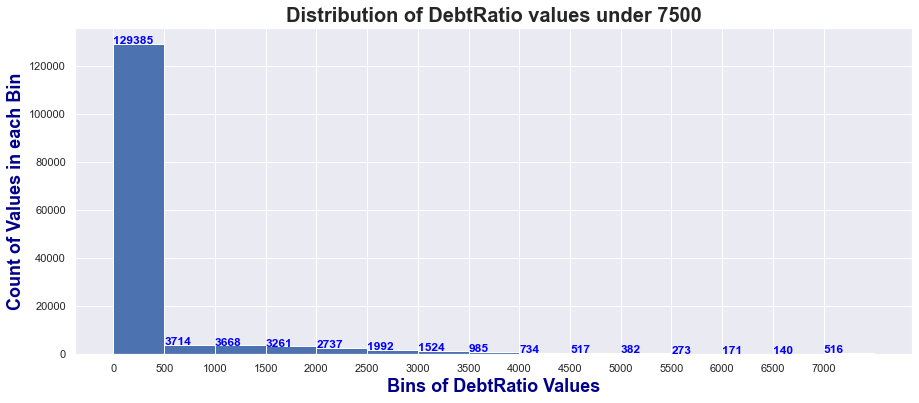

In [54]:
no_of_bins = 15
plt.figure(figsize=(15,6))
arr=plt.hist(np.clip(df['DebtRatio'], 0, 7500), bins=no_of_bins)
for i in range(no_of_bins):
    plt.text(arr[1][i],arr[0][i]  ,str(int(arr[0][i])), color = 'blue', fontweight = 'bold', fontsize=12)
plt.locator_params(axis='x', nbins=no_of_bins)
plt.xticks(np.arange(0,7500,500))

plt.xlabel("Bins of DebtRatio Values",color='darkblue', fontweight='bold', fontsize='18')
plt.ylabel("Count of Values in each Bin",color='darkblue', fontweight='bold', fontsize='18')
plt.title("Distribution of DebtRatio values under 7500", fontweight='bold', fontsize='20')
plt.show()

Text(0.5, 1.0, 'Distribution of DebtRatio values under 1')

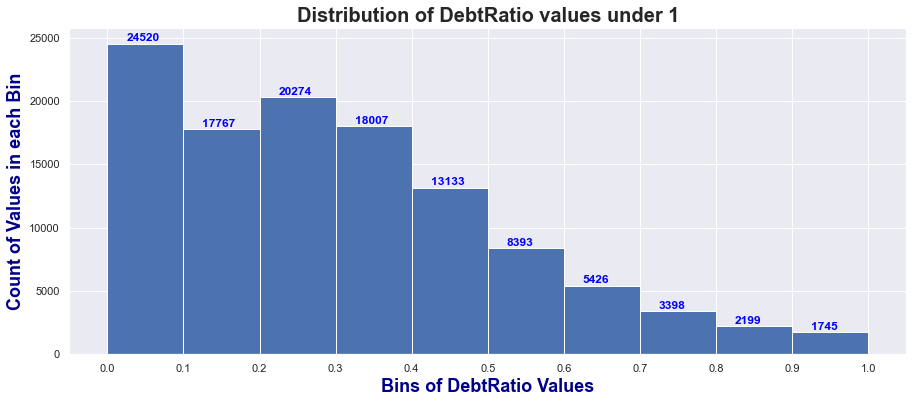

In [55]:
no_of_bins = 10
arr=plt.hist(df.loc[df['DebtRatio']<=1,'DebtRatio'])
for i in range(no_of_bins):
    plt.text(arr[1][i] + 0.025, arr[0][i] + 200, str(int(arr[0][i])), color = 'blue', fontweight = 'bold', fontsize=12)
plt.locator_params(axis='x', nbins=no_of_bins)
plt.xticks(np.arange(0,1.1,0.1))

plt.xlabel("Bins of DebtRatio Values",color='darkblue', fontweight='bold', fontsize='18')
plt.ylabel("Count of Values in each Bin",color='darkblue', fontweight='bold', fontsize='18')
plt.title("Distribution of DebtRatio values under 1", fontweight='bold', fontsize='20')

## Decision Tree Classification

### Splitting the data.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df[['DebtRatio', 'Serious']],df.Serious , test_size = 0.3)

### Selecting the optimum depth

In [57]:
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    scores = cross_val_score(tree_model, X_train.DebtRatio.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    score_ls.append(np.mean(scores))
    score_std_ls.append(np.std(scores))
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.533996     0.003350
1      2      0.558363     0.003595
2      3      0.570901     0.005105
3      4      0.575853     0.005985


### Training the model on the selected depth

In [58]:
tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(X_train.DebtRatio.to_frame(), X_train.Serious)
X_train['DebtRatio_tree'] = tree_model.predict_proba(X_train.DebtRatio.to_frame())[:,1]
X_test['DebtRatio_tree'] = tree_model.predict_proba(X_test.DebtRatio.to_frame())[:,1]

In [59]:
pd.concat( [X_train.groupby(['DebtRatio_tree'])['DebtRatio'].min(),
            X_train.groupby(['DebtRatio_tree'])['DebtRatio'].max()], axis=1)

,DebtRatio,DebtRatio
DebtRatio_tree,,
0.012085,0.000037,0.001135
0.035158,0.001141,0.010934
0.048044,936.000000,9616.000000
0.059416,0.010944,0.416447
0.061640,2.648901,935.000000
0.078929,0.000000,0.000000
0.082614,0.417018,0.722843
0.121296,0.722875,2.643339
0.131944,9641.000000,329664.000000


### Cutting DebtRatio into bins using intervals generated by the DecisionTreeClassifier.

In [60]:
cat = pd.cut(df['DebtRatio'],bins = [0.00000000e+00, 1.13895200e-03, 1.09340830e-02, 1.36125654e-01,
       4.23319489e-01, 5.63188254e-01, 5.63203602e-01, 3.97230940e+00,
       9.50000000e+01, 7.77000000e+02, 3.24900000e+03, 3.29664000e+05], labels=['0.0', '0.001138952', '0.010934083', '0.136125654', '0.423319489',
       '0.563188254', '0.563203602', '3.972309396', '95.0', '777.0',
       '3249.0',],include_lowest=True)
df.insert(2, 'DebtRatio_DT', cat)
one_hot = pd.get_dummies(df['DebtRatio_DT'],prefix='DebtRatio')
df = df.join(one_hot)

### Plotting the population of DebtRatio buckets.

<AxesSubplot:xlabel='DebtRatio_tree'>

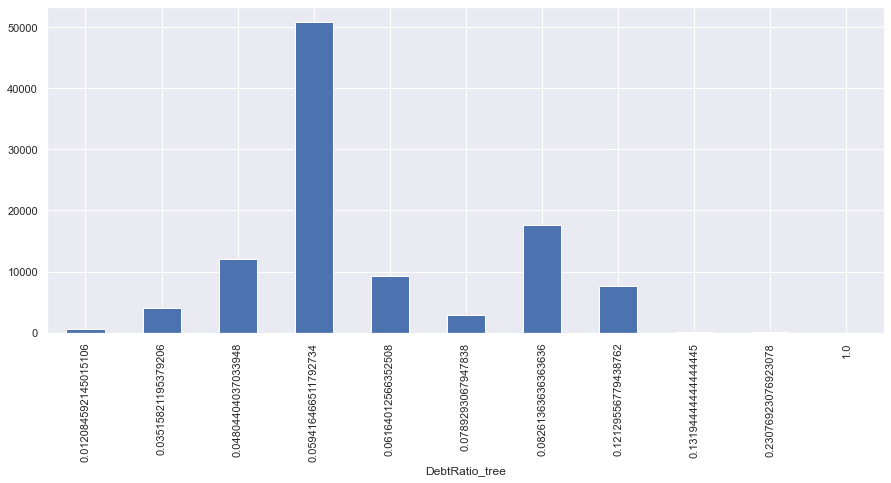

In [61]:
X_train.groupby(['DebtRatio_tree'])['Serious'].count().plot.bar()

## Debt

In [62]:
df.insert(2, 'Debt', df['MonthlyIncome'] * df['DebtRatio'])

## Decision Tree Classification

### Splitting the data.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df[['Debt', 'Serious']],df.Serious , test_size = 0.3)

### Selecting the optimum depth

In [64]:
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    scores = cross_val_score(tree_model, X_train.Debt.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    score_ls.append(np.mean(scores))
    score_std_ls.append(np.std(scores))
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.516163     0.001984
1      2      0.527858     0.003116
2      3      0.528342     0.005714
3      4      0.546296     0.002694


### Training the model on the selected depth

In [65]:
tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(X_train.Debt.to_frame(), X_train.Serious)
X_train['Debt_tree'] = tree_model.predict_proba(X_train.Debt.to_frame())[:,1]
X_test['Debt_tree'] = tree_model.predict_proba(X_test.Debt.to_frame())[:,1]

In [66]:
bin_intervals= pd.concat( [X_train.groupby(['Debt_tree'])['Debt'].min(),
            X_train.groupby(['Debt_tree'])['Debt'].max()], axis=1)
bins = np.array(bin_intervals.iloc[:,1])
bins = np.sort(bins.astype(int))

In [67]:
bins

array([-2147483648,           0,         101,         958,        4928,
              4928,       15779,      592026,     5876595,     7627699,
           7957153,    27304064,    27305198,    98063616])

### Cutting DebtRatio into bins using intervals generated by the DecisionTreeClassifier.

In [68]:
cat = pd.cut(df['Debt'],bins = [-2147483648,         100,         958,        2502,        4053,
              6023,       19633,      668622,     5878214,    12263319,
          12858965,    29225158,    29231058,    29383043], labels=[-2147483648,         100,         958,        2502,        4053,
              6023,       19633,      668622,     5878214,    12263319,
          12858965,    29225158,    29231058],include_lowest=True)
df.insert(2, 'Debt_DT', cat)
one_hot = pd.get_dummies(df['Debt_DT'],prefix='Debt')
df = df.join(one_hot)

### Plotting the population of DebtRatio buckets.

<AxesSubplot:xlabel='Debt_tree'>

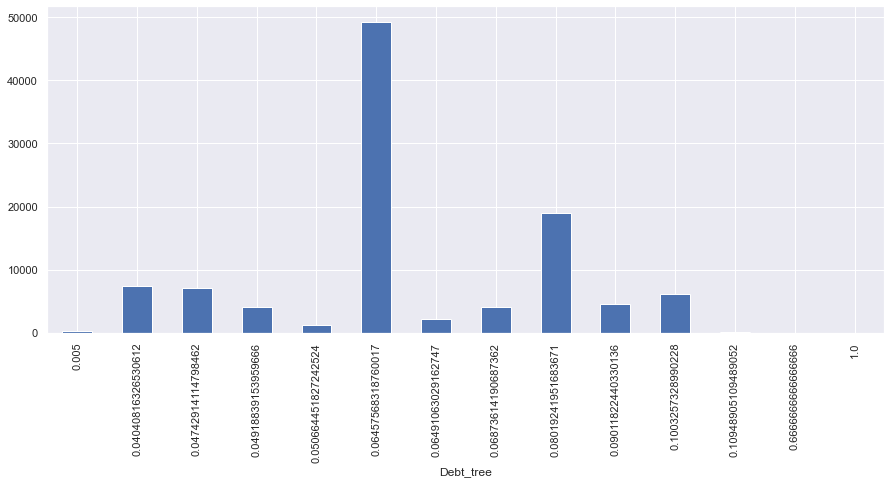

In [69]:
X_train.groupby(['Debt_tree'])['Serious'].count().plot.bar()

## Utilization

### The Relation between Utilization and Serious

#### Only 2.74% of the records having Utilization < 0.5 have Serious value of 1.

In [70]:
df[df['Utilization'] < 0.5]['Serious'].value_counts()

0    105725
1      2987
Name: Serious, dtype: int64

#### 17% of the records having Utilization > 0.5 have Serious value of 1.

In [71]:
df[df['Utilization'] >= 0.5]['Serious'].value_counts()

0    34248
1     7039
Name: Serious, dtype: int64

## DecisionTreeClassifier

### Splitting the Data

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df[['Utilization', 'Serious']],df.Serious , test_size = 0.3)

### Finding the optimum depth

In [73]:
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    scores = cross_val_score(tree_model, X_train.Utilization.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    score_ls.append(np.mean(scores))
    score_std_ls.append(np.std(scores))
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.713354     0.004928
1      2      0.759877     0.003273
2      3      0.776946     0.004066
3      4      0.780092     0.004513


### Training the model on the selected depth

In [74]:
tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(X_train.Utilization.to_frame(), X_train.Serious)
X_train['Utilization_tree'] = tree_model.predict_proba(X_train.Utilization.to_frame())[:,1]
X_test['Utilization_tree'] = tree_model.predict_proba(X_test.Utilization.to_frame())[:,1]

In [75]:
pd.concat( [X_train.groupby(['Utilization_tree'])['Utilization'].min(),
            X_train.groupby(['Utilization_tree'])['Utilization'].max()], axis=1)

,Utilization,Utilization
Utilization_tree,,
0.015604,0.000080,0.114585
0.029580,0.000000,0.000074
0.034149,0.114589,0.300889
0.058519,0.300907,0.494950
0.062112,42.000000,50708.000000
0.089008,0.495017,0.667833
0.137699,0.668093,0.862774
0.193196,0.862843,1.000769
0.259259,2.084909,29.784884


### Cutting Utilization into bins using intervals generated by DecisionTreeClassifier.

In [76]:
cat = pd.cut(df['Utilization'],bins = [0.000000,0.000024,0.131917,0.324606,0.495124,0.495301,0.701129,0.774086,0.860028,0.860278,1.000769,1.031041,29.784884,73.846154,29110.000000], labels=["0.000000","0.000024","0.131917","0.324606","0.495124","0.495301","0.701129","0.774086","0.860028","0.860278","1.000769","1.031041","29.784884","73.846154"],include_lowest=True)
df.insert(2, 'Utilization_DT', cat)
one_hot = pd.get_dummies(df['Utilization_DT'],prefix='Utilization')
df = df.join(one_hot)

Text(0.5, 1.0, 'Crosstab between Serious and Utilization_DT')

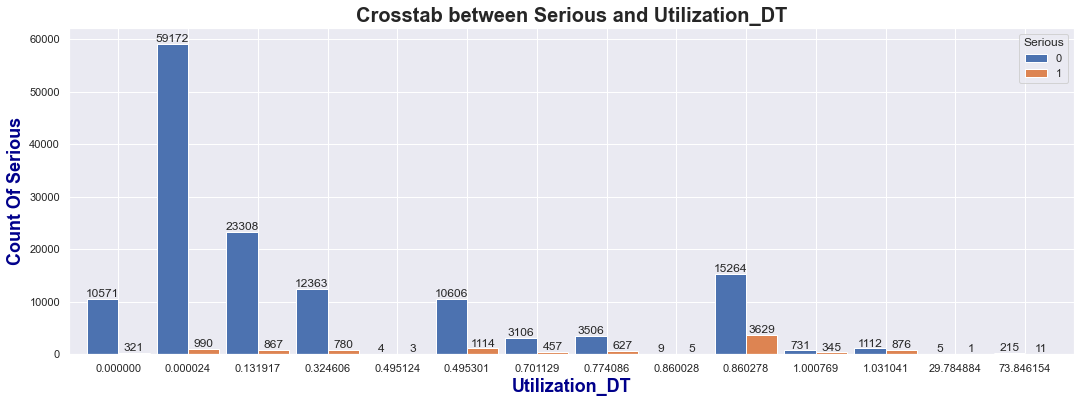

In [77]:
UTIXSerious=pd.crosstab(df['Utilization_DT'], df['Serious'])
barplot = UTIXSerious.plot.bar(rot=0,figsize=(18,6),width=0.9)
for c in barplot.containers:
    # set the bar label
    barplot.bar_label(c)
plt.xlabel("Utilization_DT",color='darkblue', fontweight='bold', fontsize='18')
plt.ylabel("Count Of Serious",color='darkblue', fontweight='bold', fontsize='18')
plt.title("Crosstab between Serious and Utilization_DT", fontweight='bold', fontsize='20')

## Loans

## Decision Tree Classification

### Using DecisionTreeClassifier to do Discretisation.

#### Splitting the Data

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df[['Loans', 'Serious']],df.Serious , test_size = 0.3)

#### Finding the optimum depth

In [79]:
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    scores = cross_val_score(tree_model, X_train.Loans.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    score_ls.append(np.mean(scores))
    score_std_ls.append(np.std(scores))
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.525123     0.008201
1      2      0.546765     0.003235
2      3      0.549178     0.004221
3      4      0.557036     0.002060


#### Training the model on the selected depth

In [80]:
tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(X_train.Loans.to_frame(), X_train.Serious)
X_train['Loans_tree'] = tree_model.predict_proba(X_train.Loans.to_frame())[:,1]
X_test['Loans_tree'] = tree_model.predict_proba(X_test.Loans.to_frame())[:,1]

In [81]:
pd.concat( [X_train.groupby(['Loans_tree'])['Loans'].min(),
            X_train.groupby(['Loans_tree'])['Loans'].max()], axis=1)

,Loans,Loans
Loans_tree,,
0.057258,6,14
0.065840,3,5
0.070155,15,56
0.093313,2,2
0.133398,1,1
0.268349,0,0
0.500000,57,57


#### Plotting the population of  Age Buckets.

<AxesSubplot:xlabel='Loans_tree'>

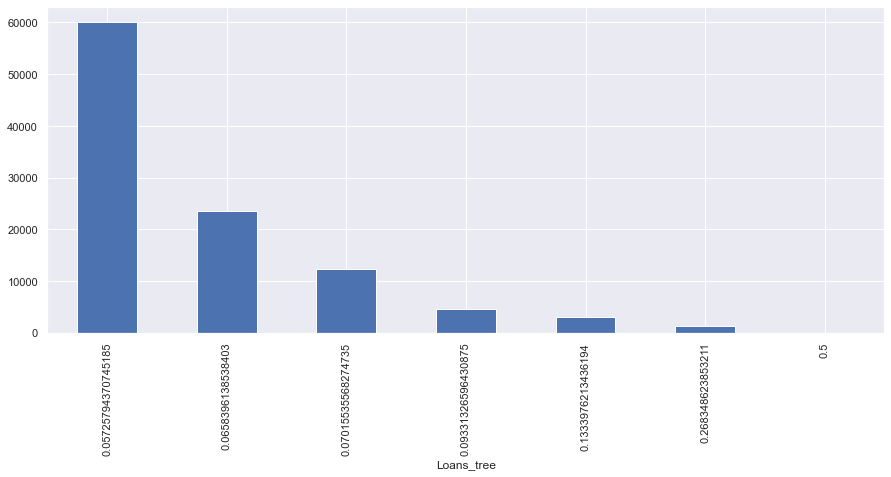

In [82]:
X_train.groupby(['Loans_tree'])['Serious'].count().plot.bar()

### Cutting the Age into bins using intervals generated by the DecisionTreeClassifier.

In [83]:
cat = pd.cut(df['Loans'],bins = [-1,0,1,2,3,5,13,56,57], labels=['== 0','== 1','== 2','== 3','<= 5','<= 13','<= 47','<= 58'],include_lowest=True)
df.insert(2, 'Loans_DT', cat)
one_hot = pd.get_dummies(df['Loans_DT'], prefix='Loans')
df = df.join(one_hot)

## RealState

## Decision Tree Classification

### Using DecisionTreeClassifier to do Discretisation.

#### Splitting the Data

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df[['RealStateLoans', 'Serious']],df.Serious , test_size = 0.3)

#### Finding the optimum depth

In [85]:
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    scores = cross_val_score(tree_model, X_train.RealStateLoans.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    score_ls.append(np.mean(scores))
    score_std_ls.append(np.std(scores))
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.549184     0.005827
1      2      0.560055     0.007100
2      3      0.564125     0.004709
3      4      0.565651     0.004357


#### Training the model on the selected depth

In [86]:
tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(X_train.RealStateLoans.to_frame(), X_train.Serious)
X_train['RealStateLoans_tree'] = tree_model.predict_proba(X_train.RealStateLoans.to_frame())[:,1]
X_test['RealStateLoans_tree'] = tree_model.predict_proba(X_test.RealStateLoans.to_frame())[:,1]

In [87]:
pd.concat( [X_train.groupby(['RealStateLoans_tree'])['RealStateLoans'].min(),
            X_train.groupby(['RealStateLoans_tree'])['RealStateLoans'].max()], axis=1)

,RealStateLoans,RealStateLoans
RealStateLoans_tree,,
0.052101,1,1
0.055946,2,2
0.064588,3,3
0.083041,0,0
0.096257,4,4
0.140845,5,6
0.190332,7,54


#### Plotting the population of  Age Buckets.

<AxesSubplot:xlabel='RealStateLoans_tree'>

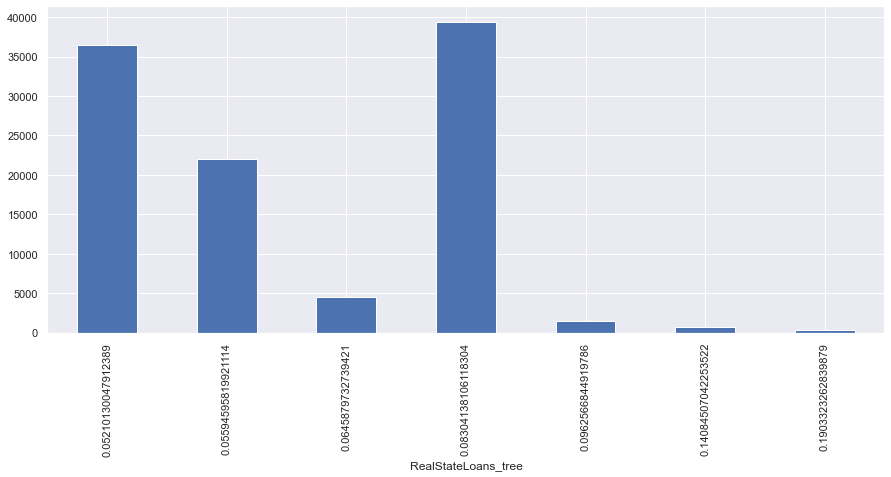

In [88]:
X_train.groupby(['RealStateLoans_tree'])['Serious'].count().plot.bar()

### Cutting the Age into bins using intervals generated by the DecisionTreeClassifier.

In [89]:
cat = pd.cut(df['RealStateLoans'],bins = [-1,0,1,2,3,4,5,9,11,16,54], labels=['== 0','== 1','== 2','<= 3','<= 4','<= 5','<= 9','<= 11','<= 16','<= 54'],include_lowest=True)
df.insert(2, 'RealStateLoans_DT', cat)
one_hot = pd.get_dummies(df['RealStateLoans_DT'], prefix='RealStateLoans')
df = df.join(one_hot)

In [90]:
df['RealStateLoans_<= 3'].sum()

6300

In [91]:
df[df['RealStateLoans'] == 2]['RealStateLoans']

Index
12        2
13        2
17        2
21        2
34        2
         ..
149967    2
149971    2
149976    2
149992    2
150000    2
Name: RealStateLoans, Length: 31521, dtype: int64

## Dependents

## Decision Tree Classification

### Using DecisionTreeClassifier to do Discretisation.

#### Splitting the Data

In [92]:
X_train, X_test, y_train, y_test = train_test_split(df[['Dependents', 'Serious']],df.Serious , test_size = 0.3)

#### Finding the optimum depth

In [93]:
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    scores = cross_val_score(tree_model, X_train.Dependents.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    score_ls.append(np.mean(scores))
    score_std_ls.append(np.std(scores))
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.545142     0.006154
1      2      0.548148     0.006952
2      3      0.550478     0.006837
3      4      0.551204     0.006450


#### Training the model on the selected depth

In [94]:
tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(X_train.Dependents.to_frame(), X_train.Serious)
X_train['Dependents_tree'] = tree_model.predict_proba(X_train.Dependents.to_frame())[:,1]
X_test['Dependents_tree'] = tree_model.predict_proba(X_test.Dependents.to_frame())[:,1]

In [95]:
pd.concat( [X_train.groupby(['Dependents_tree'])['Dependents'].min(),
            X_train.groupby(['Dependents_tree'])['Dependents'].max()], axis=1)

,Dependents,Dependents
Dependents_tree,,
0.035714,8.0,20.0
0.056952,0.0,0.0
0.072797,1.0,1.0
0.080551,2.0,2.0
0.090292,3.0,3.0
0.107612,4.0,7.0


#### Plotting the population of  Age Buckets.

<AxesSubplot:xlabel='Dependents_tree'>

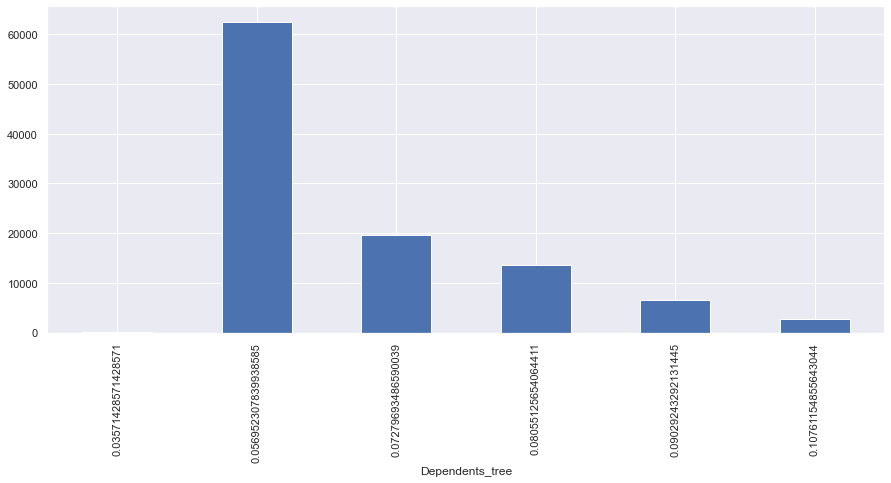

In [96]:
X_train.groupby(['Dependents_tree'])['Serious'].count().plot.bar()

### Cutting the Age into bins using intervals generated by the DecisionTreeClassifier.

In [97]:
cat = pd.cut(df['Dependents'],bins = [-1,0,1,2,3,7,20], labels=['<= 0','<= 1','<= 2','<= 3','<= 7','<= 20'],include_lowest=True)
df.insert(2, 'Dependents_DT', cat)
one_hot = pd.get_dummies(df['Dependents_DT'], prefix='Dependents')
df = df.join(one_hot)

# Logistic Regression

In [98]:
df.columns

Index(['Serious', 'Age', 'Dependents_DT', 'RealStateLoans_DT', 'Loans_DT',
       'Utilization_DT', 'Debt_DT', 'Debt', 'DebtRatio_DT', 'Age_DT',
       ...
       'RealStateLoans_<= 9', 'RealStateLoans_<= 11', 'RealStateLoans_<= 16',
       'RealStateLoans_<= 54', 'Dependents_<= 0', 'Dependents_<= 1',
       'Dependents_<= 2', 'Dependents_<= 3', 'Dependents_<= 7',
       'Dependents_<= 20'],
      dtype='object', length=109)

In [99]:
x = df[['Dependents','Loans', 'RealStateLoans_== 0', 'RealStateLoans_== 1', 'RealStateLoans_== 2',
       'RealStateLoans_<= 3', 
       'Age_<= 22', 'Age_<= 28', 'Age_<= 33',
       'Age_<= 36', 'Age_<= 42', 'Age_<= 47', 'Age_<= 52',
       'Age_<= 55', 'Age_<= 56', 'Age_<= 57', 'Age_<= 62',
       'Age_<= 63', 'Age_<= 67', 'Age_98',
       'MonthlyIncome_930', 'MonthlyIncome_3679',
       'MonthlyIncome_3877',
       'MonthlyIncome_4895',
       'MonthlyIncome_5195',
       'MonthlyIncome_5323',
       'Utilization_0.000000',
       'Utilization_0.000024', 'Utilization_0.131917',
       'Utilization_0.701129',
       'Utilization_0.774086', 'Utilization_0.860028',
       'Utilization_0.860278', 'Utilization_1.000769',
       'Utilization_1.031041']]
y = df['Serious']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)

## Oversampling

In [101]:
while(True):
    try:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)
        sm_os = SMOTE(sampling_strategy = 0.1)
        x_train_res, y_train_res = sm_os.fit_resample(x_train, y_train)
        log_reg = sm.Logit(y_train_res, x_train_res).fit()
        yhat = log_reg.predict(x_test)
        auc = roc_auc_score(y_test, yhat)
        print('AUC = ' + str(auc))
        break
    except np.linalg.LinAlgError as err:
        print(err)

Optimization terminated successfully.
         Current function value: 0.245847
         Iterations 8
AUC = 0.8061082945928388


Text(0.5, 320.8, 'Predicted label')

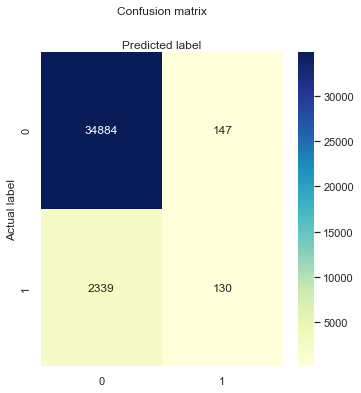

In [102]:
cnf_matrix = confusion_matrix(y_test, list(map(round, yhat)))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

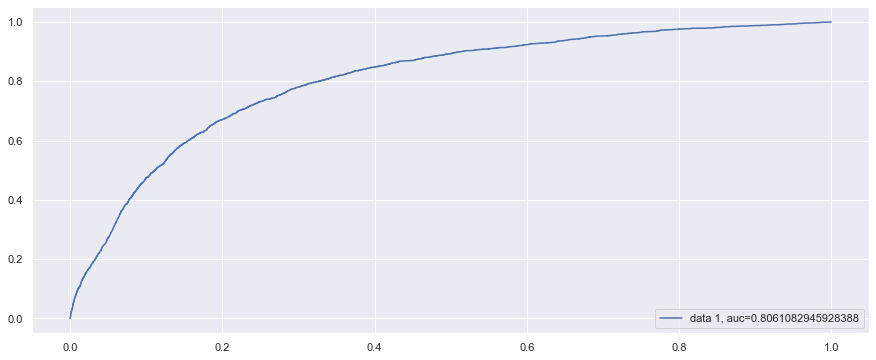

<Figure size 360x360 with 0 Axes>

In [103]:
fpr, tpr, _ = roc_curve(y_test,  yhat)
auc = roc_auc_score(y_test, yhat)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.figure(figsize=(5,5))
plt.show()

In [104]:
print(classification_report(y_test, list(map(round, yhat)), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     35031
           1       0.47      0.05      0.09      2469

    accuracy                           0.93     37500
   macro avg       0.70      0.52      0.53     37500
weighted avg       0.91      0.93      0.91     37500



In [105]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                Serious   No. Observations:               115436
Model:                          Logit   Df Residuals:                   115401
Method:                           MLE   Df Model:                           34
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.1930
Time:                        11:56:35   Log-Likelihood:                -28380.
converged:                       True   LL-Null:                       -35166.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Dependents               0.0692      0.010      6.992      0.000       0.050       0.089
Loans                    0.0454      0.002     19.584      0.000       0.041       0.050
RealStateLoa

## Undersampling

In [106]:
x = df[['Dependents','Loans', 'RealStateLoans_== 0', 'RealStateLoans_== 1', 'RealStateLoans_== 2',
       'RealStateLoans_<= 3', 'RealStateLoans_<= 4', 
       'Age_<= 28', 'Age_<= 33',
       'Age_<= 36', 'Age_<= 42', 'Age_<= 47', 'Age_<= 52',
       'Age_<= 55', 'Age_<= 67', 'Age_98',
       'MonthlyIncome_260',
       'MonthlyIncome_930', 'MonthlyIncome_3679',
       'MonthlyIncome_3877',
       'MonthlyIncome_4895',
       'MonthlyIncome_5195',
       'MonthlyIncome_5323',
       'Utilization_0.000000',
       'Utilization_0.000024', 'Utilization_0.131917',
       'Utilization_0.701129',
       'Utilization_0.774086', 
       'Utilization_0.860278', 'Utilization_1.000769',
       'Utilization_1.031041']]
y = df['Serious']

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)

In [108]:
while(True):
    try:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)   
        under = RandomUnderSampler(sampling_strategy=0.8) 
        X_smote, y_smote = under.fit_resample(x_train, y_train)
        log_reg = sm.Logit(y_smote, X_smote).fit()
        yhat = log_reg.predict(x_test)
        auc = roc_auc_score(y_test, yhat)
        print('AUC = ' + str(auc))
        break
    except np.linalg.LinAlgError as err:
        print(err)

Optimization terminated successfully.
         Current function value: 0.531980
         Iterations 6
AUC = 0.8072268664337213


In [109]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                Serious   No. Observations:                17003
Model:                          Logit   Df Residuals:                    16972
Method:                           MLE   Df Model:                           30
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.2256
Time:                        11:56:35   Log-Likelihood:                -9045.3
converged:                       True   LL-Null:                       -11680.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Dependents               0.0782      0.017      4.730      0.000       0.046       0.111
Loans                    0.0409      0.004     11.168      0.000       0.034       0.048
RealStateLoa

Text(0.5, 320.8, 'Predicted label')

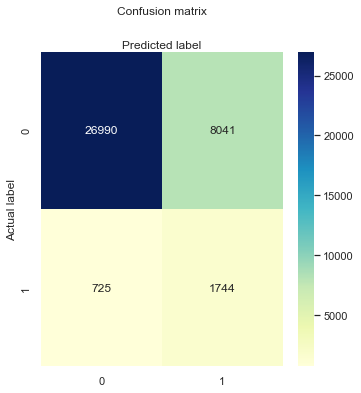

In [110]:
cnf_matrix = confusion_matrix(y_test, list(map(round, yhat)))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

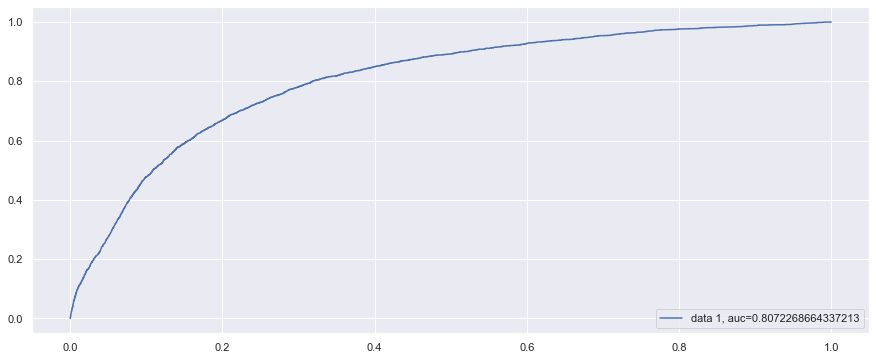

<Figure size 360x360 with 0 Axes>

In [111]:
fpr, tpr, _ = roc_curve(y_test,  yhat)
auc = roc_auc_score(y_test, yhat)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.figure(figsize=(5,5))
plt.show()

In [112]:
print(classification_report(y_test, list(map(round, yhat)), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     35031
           1       0.18      0.71      0.28      2469

    accuracy                           0.77     37500
   macro avg       0.58      0.74      0.57     37500
weighted avg       0.92      0.77      0.82     37500



## Basic Model

In [254]:
x = df[['Dependents',
        'Age_<= 28', 'Age_<= 33', 'Age_<= 36', 'Age_<= 42', 'Age_<= 47', 'Age_<= 52', 'Age_<= 55',
        'Age_<= 56', 'Age_<= 57', 'Age_<= 62', 'Age_98', 'Age_<= 109',
        'MonthlyIncome_0','MonthlyIncome_816', 'MonthlyIncome_930',
        'MonthlyIncome_3679','MonthlyIncome_3877', 
        'MonthlyIncome_4895','MonthlyIncome_5195',
        'MonthlyIncome_9949',
        'Debt_4053', 'Debt_6023',
        'Debt_668622',
        'Utilization_0.000024', 'Utilization_0.324606',
        'Utilization_0.495124', 'Utilization_0.495301', 'Utilization_0.701129', 'Utilization_0.774086',
        'Utilization_0.860028', 'Utilization_0.860278', 'Utilization_1.000769', 'Utilization_1.031041',
        'Utilization_29.784884',
        'Loans_== 0', 'Loans_== 1', 'Loans_== 2', 'Loans_== 3', 'Loans_<= 5', 'Loans_<= 13', 'Loans_<= 47',
        'RealStateLoans_== 0', 'RealStateLoans_== 1', 'RealStateLoans_== 2', 'RealStateLoans_<= 3',
        'RealStateLoans_<= 4',  ]]
y = df['Serious']

In [255]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)

In [256]:
while(True):
    try:
        log_reg = sm.Logit(y_train, x_train).fit()
        yhat = log_reg.predict(x_test)
        break
    except np.linalg.LinAlgError as err:
        print(err)

Optimization terminated successfully.
         Current function value: 0.205155
         Iterations 8


In [257]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                Serious   No. Observations:               112499
Model:                          Logit   Df Residuals:                   112452
Method:                           MLE   Df Model:                           46
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.1669
Time:                        12:06:48   Log-Likelihood:                -23080.
converged:                       True   LL-Null:                       -27705.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Dependents                0.0711      0.011      6.254      0.000       0.049       0.093
Age_<= 28                 0.5977      0.072      8.298      0.000       0.457       0.739
Age_<= 3

Text(0.5, 320.8, 'Predicted label')

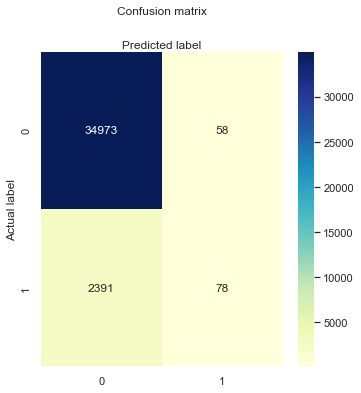

In [258]:
cnf_matrix = confusion_matrix(y_test, list(map(round, yhat)))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

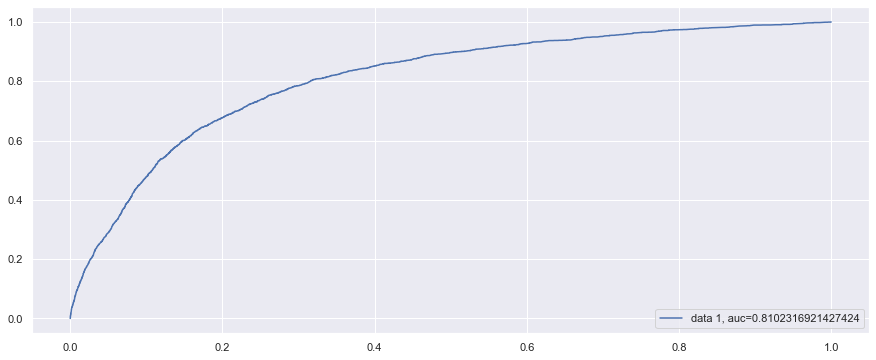

<Figure size 360x360 with 0 Axes>

In [259]:
fpr, tpr, _ = roc_curve(y_test,  yhat)
auc = roc_auc_score(y_test, yhat)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.figure(figsize=(5,5))
plt.show()

In [217]:
print(classification_report(y_test, list(map(round, yhat)), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     35031
           1       0.55      0.03      0.05      2469

    accuracy                           0.93     37500
   macro avg       0.74      0.51      0.51     37500
weighted avg       0.91      0.93      0.91     37500



# Percentiles

### Creating Pred vs Real DataFrame

In [120]:
x.shape

(149999, 70)

In [121]:
yhat2 = log_reg.predict(x)

In [122]:
pred_vs_test = pd.DataFrame(y).join(pd.DataFrame(yhat2))
pred_vs_test=pred_vs_test.rename(columns={0: 'Score', 'Serious': 'Real'})

In [123]:
pred_vs_test.Score*=1000

### Creating percentiles

In [124]:
percentiles_real = []
for i in range(5,105,5):
    percentiles_real.append(np.percentile(pred_vs_test.Real, i))
percentiles_pred = []
for i in range(5,105,5):
    percentiles_pred.append(np.percentile(pred_vs_test.Score, i))

## Creating Percentiles DataFrame

In [125]:
percentiles_real_df = pd.DataFrame(percentiles_real,columns=['Real'])
percentiles_pred_df = pd.DataFrame(percentiles_pred,columns=['Score'])
percentiles_real_df.index=[np.round(np.arange(0.05,1.05,0.05), 2)]
percentiles_pred_df.index=[np.round(np.arange(0.05,1.05,0.05), 2)]
percentiles = percentiles_real_df.join(pd.DataFrame(percentiles_pred_df))

### Adding Real 0s and 1s percentages in each percentile

In [126]:
percentiles = pd.concat([percentiles,pd.DataFrame(columns=list(['R0','R1']))])

### First Percentile

In [127]:
p = pred_vs_test.query('Score < 9.457829')
if(len(p['Real'].value_counts()) == 1):
    percentiles.loc[0.05, "Probability of 0s"] = p['Real'].value_counts()[0]/p.Real.count()
    percentiles.loc[0.05, "Probability of 1s"] = 0
else:
    percentiles.loc[0.05, "Probability of 0s"] = p['Real'].value_counts()[0]/p.Real.count()
    percentiles.loc[0.05, "Probability of 1s"] = p['Real'].value_counts()[1]/p.Real.count()

### Second Percentile

In [128]:
p = pred_vs_test.query('Score >= 227.787430')
if(len(p['Real'].value_counts()) == 1):
    percentiles.loc[1, "Probability of 0s"] = p['Real'].value_counts()[0]/p.Real.count()
    percentiles.loc[1, "Probability of 1s"] = 0
else:
    percentiles.loc[1, "Probability of 0s"] = p['Real'].value_counts()[0]/p.Real.count()
    percentiles.loc[1, "Probability of 1s"] = p['Real'].value_counts()[1]/p.Real.count()

### Other Percentiles

In [129]:
for i in np.round(np.arange(0.1,1,0.05), 2):
    p = pred_vs_test.query('Score >= {0} and Score < {1}'.format(percentiles.loc[np.round(i-0.05,2),'Score'].values[0],percentiles.loc[i,'Score'].values[0]))
    if(len(p['Real'].value_counts()) == 1):
        percentiles.loc[i, "Probability of 0s"] = p['Real'].value_counts()[0]/p.Real.count()
        percentiles.loc[i, "Probability of 1s"] = 0
    else:
        percentiles.loc[i, "Probability of 0s"] = p['Real'].value_counts()[0]/p.Real.count()
        percentiles.loc[i, "Probability of 1s"] = p['Real'].value_counts()[1]/p.Real.count()

In [130]:
percentiles[['Score','Probability of 0s','Probability of 1s']]

,Score,Probability of 0s,Probability of 1s
0.05,8.726240,0.993207,0.006793
0.10,10.709625,0.992798,0.007202
0.15,12.510161,0.988679,0.011321
0.20,14.628708,0.987229,0.012771
0.25,16.771952,0.984671,0.015329
0.30,18.741933,0.984642,0.015358
0.35,21.016954,0.984691,0.015309
0.40,23.827856,0.977733,0.022267
0.45,27.149527,0.973842,0.026158
0.50,31.586958,0.970953,0.029047


# Random Forest

In [131]:
x = df[[ 'Age', 'Debt','MonthlyIncome','Dependents','Utilization','DebtRatio','Loans','RealStateLoans']]
y = df['Serious']

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)

In [133]:
from sklearn.ensemble import RandomForestRegressor 
    # create regressor object
RFR = RandomForestRegressor(n_estimators = 33, max_depth=9, random_state = 0)

# fit the regressor with x and y data
RFR.fit(x_train,y_train)
yhat =RFR.predict(x_test)
print(roc_auc_score(y_test, yhat))

0.8080888640448403


In [134]:
RFR.feature_importances_

array([0.07312236, 0.05709224, 0.06840868, 0.01957209, 0.63649352,
       0.06924172, 0.0521925 , 0.0238769 ])

Text(0.5, 320.8, 'Predicted label')

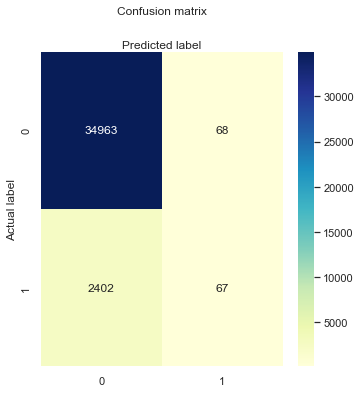

In [135]:
cnf_matrix = confusion_matrix(y_test, list(map(round, yhat)))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

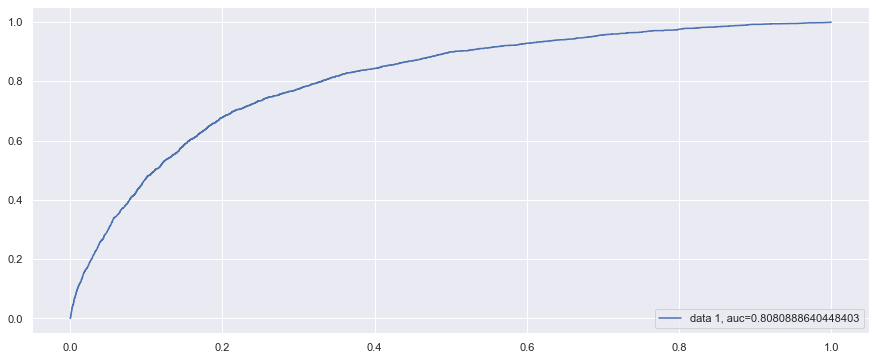

<Figure size 360x360 with 0 Axes>

In [136]:
fpr, tpr, _ = roc_curve(y_test,  yhat)
auc = roc_auc_score(y_test, yhat)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.figure(figsize=(5,5))
plt.show()

In [137]:
print(classification_report(y_test, list(map(round, yhat)), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     35031
           1       0.50      0.03      0.05      2469

    accuracy                           0.93     37500
   macro avg       0.72      0.51      0.51     37500
weighted avg       0.91      0.93      0.91     37500



Text(0.5, 0, 'Random Forest Feature Importance')

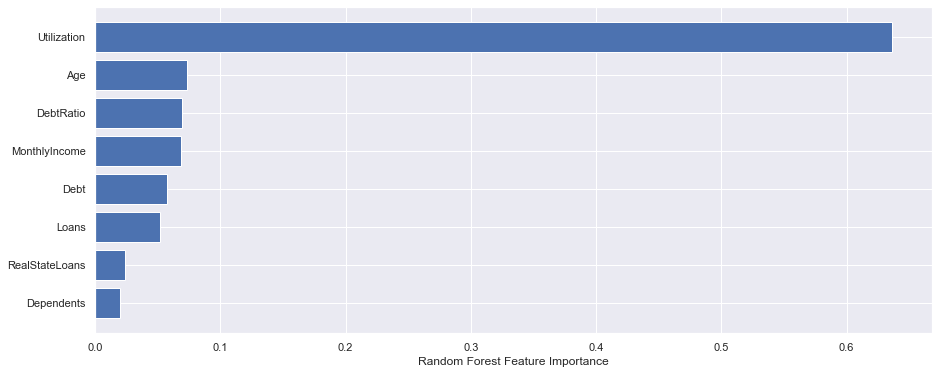

In [138]:
sorted_idx = RFR.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], RFR.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

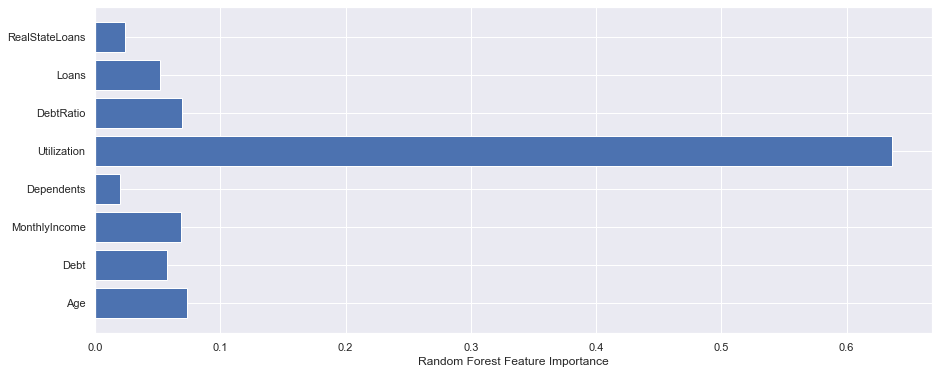

In [139]:
sorted_idx = RFR.feature_importances_
plt.barh(x.columns, RFR.feature_importances_)
plt.xlabel("Random Forest Feature Importance")